In [1]:
# dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# load 2020 world happiness dataset
file_path = Path("Resources/2020.csv")
happiness_2020 = pd.read_csv(file_path)
happiness_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [4]:
# remove unnecessary columns
happiness_2020_clean = happiness_2020.drop(columns=["Country name", "Standard error of ladder score", 
                                                    "upperwhisker", "lowerwhisker", "Logged GDP per capita", "Social support", 
                                                    "Healthy life expectancy", "Freedom to make life choices", 
                                                    "Generosity", "Perceptions of corruption", "Ladder score in Dystopia"])
happiness_2020_clean.head()

,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
# group by region
happiness_2020_clean_grouped = happiness_2020_clean.groupby(["Regional indicator"]).mean()
happiness_2020_clean_grouped

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,
Central and Eastern Europe,5.883818,1.079527,1.311129,0.826199,0.447895,0.131079,0.054702,2.033282
Commonwealth of Independent States,5.358342,0.841350,1.268998,0.702987,0.464354,0.171706,0.122152,1.786795
East Asia,5.714850,1.185275,1.276376,0.932255,0.436815,0.164634,0.150638,1.568866
Latin America and Caribbean,5.981786,0.871039,1.269381,0.774657,0.520302,0.151457,0.086553,2.308386
Middle East and North Africa,5.227159,0.998307,1.127260,0.724121,0.375862,0.143173,0.112388,1.746049
North America and ANZ,7.173525,1.307087,1.451136,0.971216,0.611826,0.307593,0.325313,2.199327
South Asia,4.475443,0.640591,0.920061,0.620979,0.449734,0.222228,0.093571,1.528265
Southeast Asia,5.383367,0.890821,1.191915,0.702408,0.618563,0.306065,0.148924,1.524672
Sub-Saharan Africa,4.383495,0.437448,0.856232,0.356113,0.387285,0.200586,0.106646,2.039189


In [23]:
# sort ladder score from largest to smallest
happiness_2020_clean_grouped.sort_values(by=['Ladder score'], ascending = False)

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,
North America and ANZ,7.173525,1.307087,1.451136,0.971216,0.611826,0.307593,0.325313,2.199327
Western Europe,6.899219,1.300418,1.402224,0.995932,0.549439,0.224752,0.262678,2.163781
Latin America and Caribbean,5.981786,0.871039,1.269381,0.774657,0.520302,0.151457,0.086553,2.308386
Central and Eastern Europe,5.883818,1.079527,1.311129,0.826199,0.447895,0.131079,0.054702,2.033282
East Asia,5.714850,1.185275,1.276376,0.932255,0.436815,0.164634,0.150638,1.568866
Southeast Asia,5.383367,0.890821,1.191915,0.702408,0.618563,0.306065,0.148924,1.524672
Commonwealth of Independent States,5.358342,0.841350,1.268998,0.702987,0.464354,0.171706,0.122152,1.786795
Middle East and North Africa,5.227159,0.998307,1.127260,0.724121,0.375862,0.143173,0.112388,1.746049
South Asia,4.475443,0.640591,0.920061,0.620979,0.449734,0.222228,0.093571,1.528265


In [24]:
# check average worldwide happiness score
#happiness_2020_clean_grouped = happiness_2020_clean.mean()
#happiness_2020_clean_grouped

In [10]:
# dependent/independent variables
y = happiness_2020_clean_grouped["Ladder score"]
X = happiness_2020_clean_grouped.drop(columns=["Ladder score"])

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [12]:
# create linear regression model
model = LinearRegression()

In [13]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 0.9970215225328223


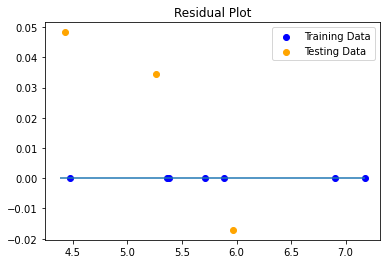

In [14]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), 
            model.predict(X_train) - y_train, c="blue", 
            label="Training Data")
plt.scatter(model.predict(X_test), 
            model.predict(X_test) - y_test, c="orange",
            label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 0.00038082457655009926
R-squared (R2 ): 0.9994832192371074


In [19]:
# generate multiple regression model
print(model.coef_)
print(model.intercept_)

[1.18663441 0.92132158 0.69800683 1.04947628 0.78772885 1.15701869
 0.99536429]
0.15769117353480588
